MATEUS LUCAS FRANCO - 202010520

Seguem abaixo lista de itens que devem estar implementados no código: 

1. Instalar e importar a biblioteca dlib, além de todas as outras bibliotecas necessárias;
2. Carregar o detector de faces da dlib;
3. Fazer o upload do modelo de marcações faciais (5 ou 68 marcos, você escolhe). Carregar o modelo de marcos faciais escolhido. Lembre-se de que tal modelo está disponível na seção "Detecção de Faces e Biometria Facial" do AVA;
4. Carregar uma imagem contendo uma ou mais faces aproximadamente em posição frontal do rosto;
5. Chamar o detector de faces da dlib, detectar todas as faces da imagem escolhida, encontrando o retângulo envolvente ao redor de cada face. Lembre-se de que as coordenadas do retângulo são:
                    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
6. A partir dos retângulos envolventes das faces encontradas, chamar o detector de marcos faciais de cada face, e desenhar um círculo VERMELHO em cima de cada marco facial;
7. Depois de encontrar os marcos faciais, desenhar um círculo centrado no ponto médio da face, lembrando que esse ponto possui coordenadas x e y dadas por: x=(l+r)/2  e y=(t+b)/2. O raio do círculo deve ser (r-l)/2.
8. DOCUMENTAR TODO O CÓDIGO. CÓDIGO SEM DOCUMENTAÇÃO, AINDA QUE CORRETO, NÃO SERÁ CONSIDERADO.

Depois de pronta, a implementação deve ser submetida ao github dos alunos, e um link contendo o arquivo de código desenvolvido deve ser enviado no texto dessa tarefa, de forma que o código fonte resultante possa ser aberto e avaliado. 

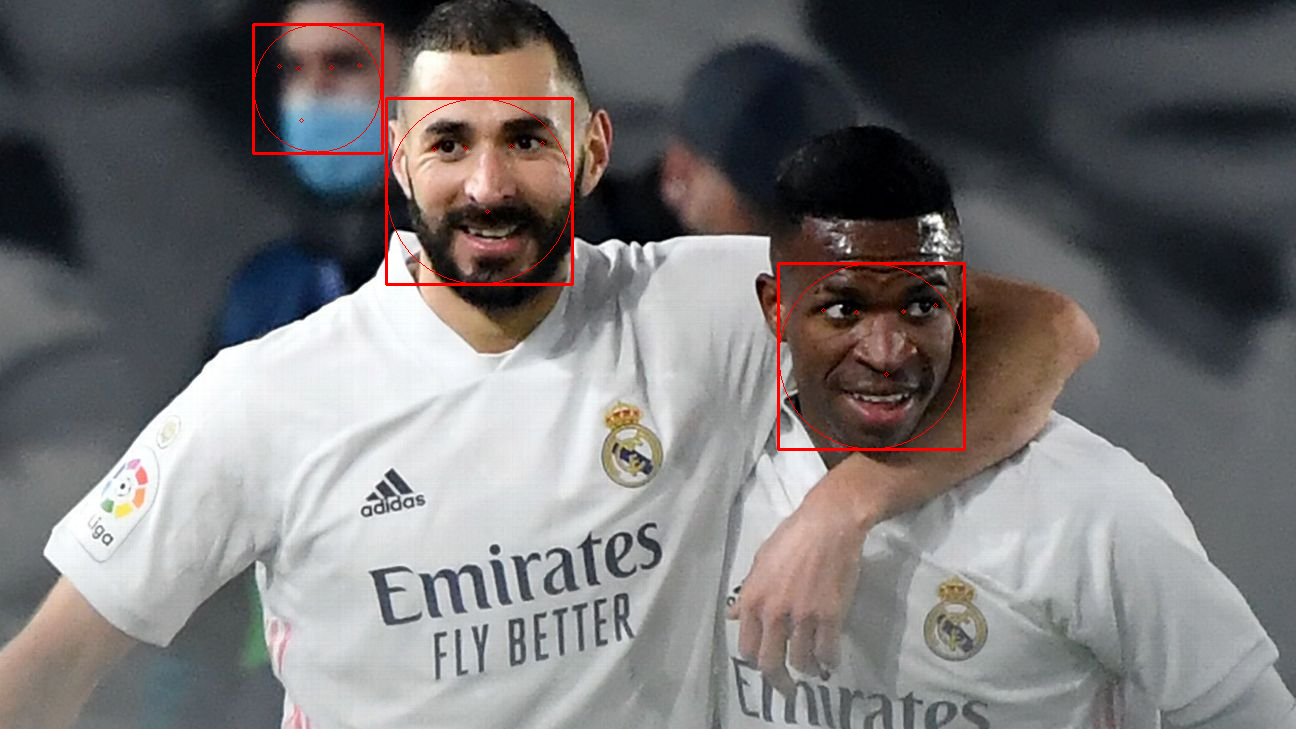

In [ ]:
from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import dlib #Instalação e importação das bibliotecas necessárias juntamente com a dlib

rostos = dlib.get_frontal_face_detector() #Nesta linha está sendo carregado o detector de faces
detector_marcos = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat') #Diferente do de cima esse aqui é o detector de MARCOS FACIAIS

rosto = cv2.imread('real.jpg') #Leitura da imagem carregada
deteccoes = rostos(rosto, 1) #Detecção dos rostos na foto, armazenando em deteccoes
for marca_rosto in deteccoes: #Estrutura de repetição usado para percorrer o vetor deteccoes
  pontos = detector_marcos(rosto, marca_rosto) #Armazenando marcos faciais encontrados em cada rosto do vetor detector_marcos 

  for pontos in pontos.parts():
    cv2.circle(rosto, (pontos.x, pontos.y), 2, (0,0,255), 1) #Linha onde é desenhado os marcos faciais, inicialmente detectado no detector_marcos
    l, t, r, b = marca_rosto.left(), marca_rosto.top(), marca_rosto.right(), marca_rosto.bottom() #Armazenando os lados do retângulo em diferentes variáveis
    cv2.rectangle(rosto, (l,t), (r, b), (0,0,255), 2) #Nesta parte é desenhado o retângulo com a cor vermelha
    cv2.circle(rosto, ((l+r)//2, (t+b)//2), (r-l)//2, (0,0,255)) #Desenho dos círculos com a cor vermelha efetuando o cálculo pedido no enunciado da questão 7

cv2_imshow(rosto) #Impressão da foto com o resultado dos detectores